In [5]:
%matplotlib inline
import os, sys, gc
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
load_dir = 'lo-shot-dinos-classification-genetic-pilot'
print(os.listdir(load_dir))

['b', 'html-button-response.csv', 'participants.csv', 'survey-multi-choice.csv']


Held-out Label Pair: 1
Mean Accuracy (subject-level): 0.86
Mean Accuracy (population-level): 0.9
MSE: 0.02568172995399658
R^2: 0.9351225717974065
Held-out Label Pair: 2
Mean Accuracy (subject-level): 0.835
Mean Accuracy (population-level): 0.9
MSE: 0.03199666134174362
R^2: 0.9189034055462079
Held-out Label Pair: 4
Mean Accuracy (subject-level): 0.875
Mean Accuracy (population-level): 1.0
MSE: 0.07147068094450584
R^2: -1.9472445750311682
Held-out Label Pair: 5
Mean Accuracy (subject-level): 0.77
Mean Accuracy (population-level): 1.0
MSE: 0.025135078488251007
R^2: 0.5184850864319732
Held-out Label Pair: 6
Mean Accuracy (subject-level): 0.87
Mean Accuracy (population-level): 1.0
MSE: 0.020596653681210244
R^2: 0.939323453583119
Held-out Label Pair: 7
Mean Accuracy (subject-level): 0.9
Mean Accuracy (population-level): 0.95
MSE: 0.03569789091396522
R^2: 0.9154378990549208
Held-out Label Pair: 8
Mean Accuracy (subject-level): 0.665
Mean Accuracy (population-level): 0.8
MSE: 0.164849066091933

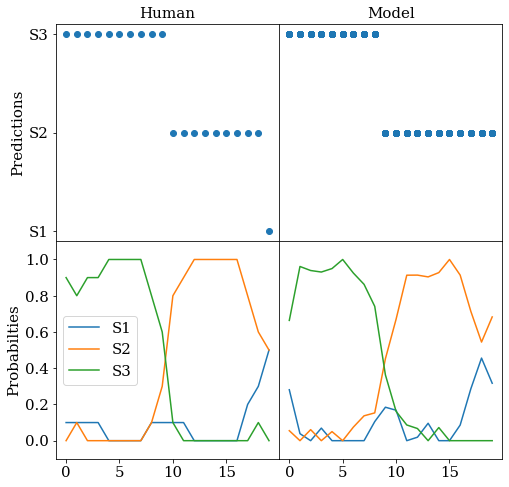

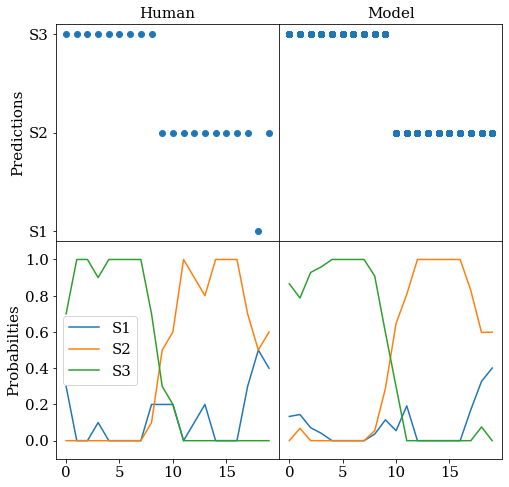

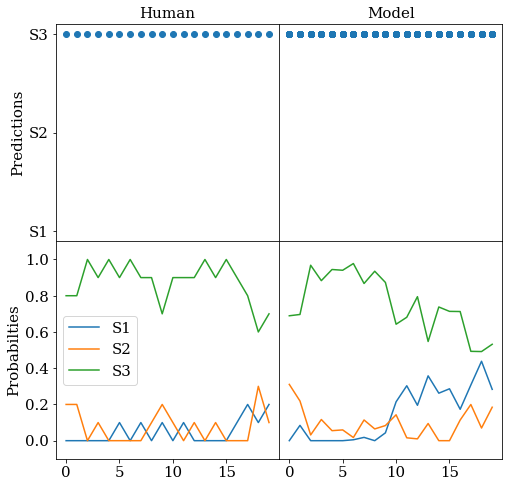

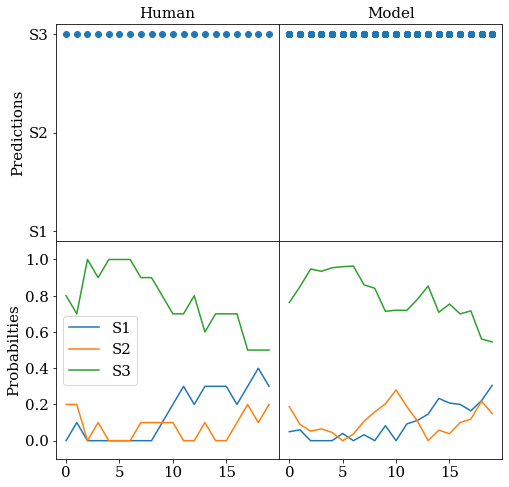

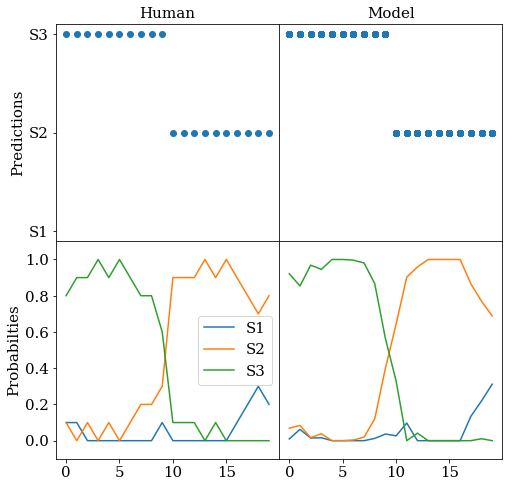

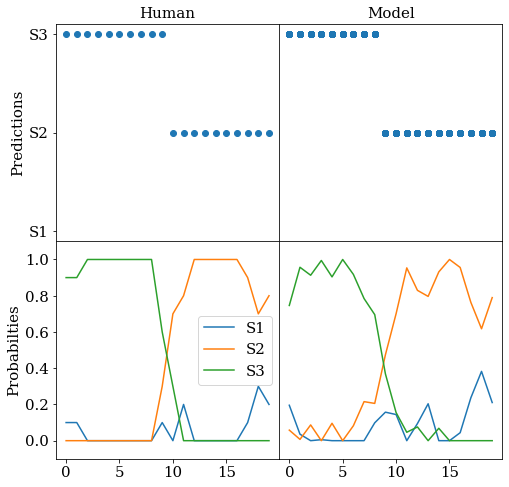

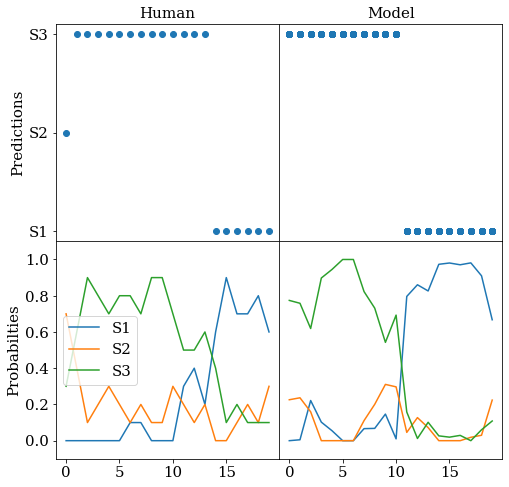

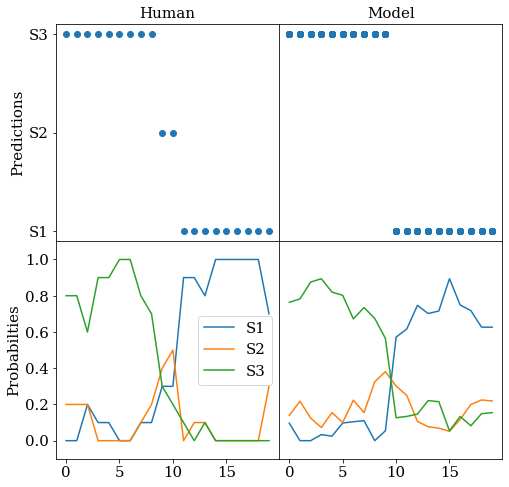

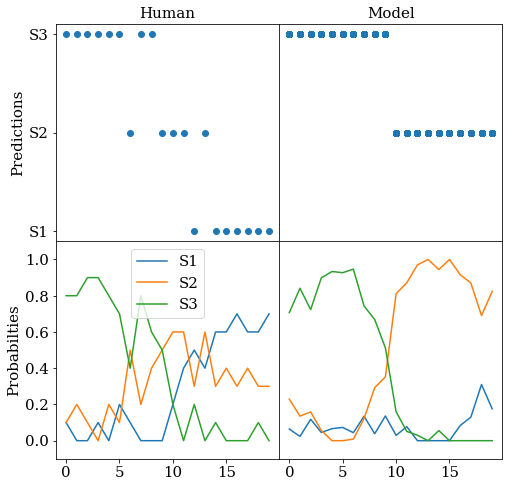

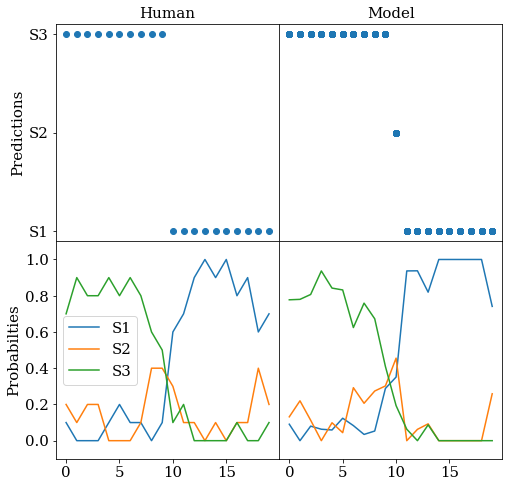

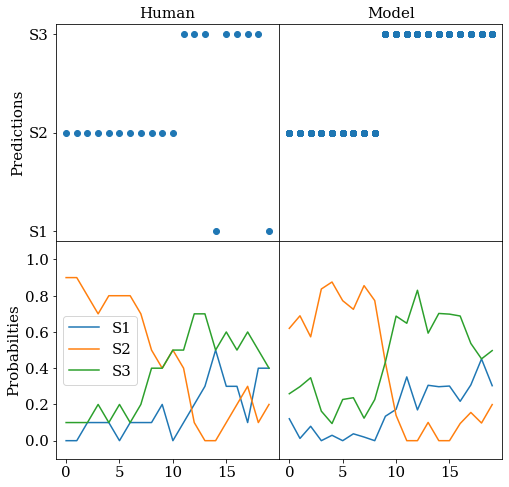

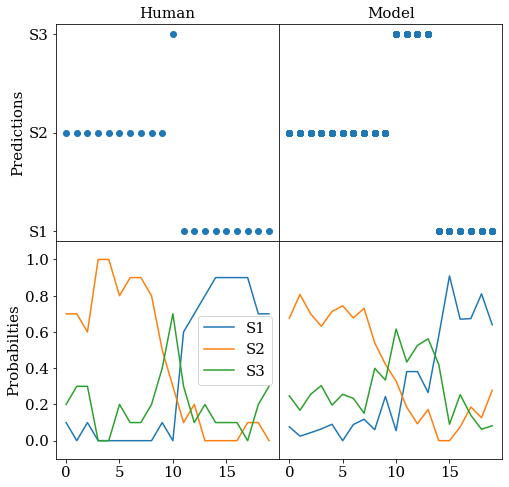

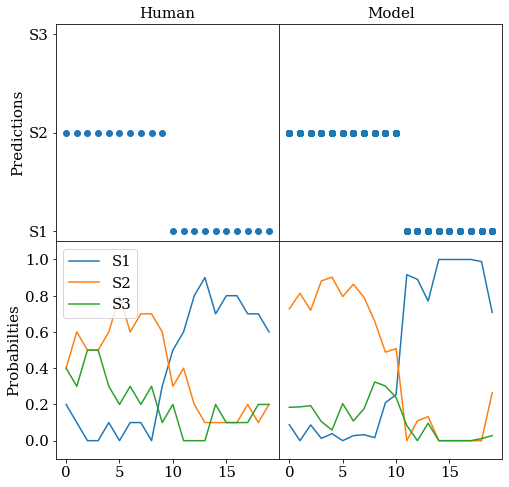

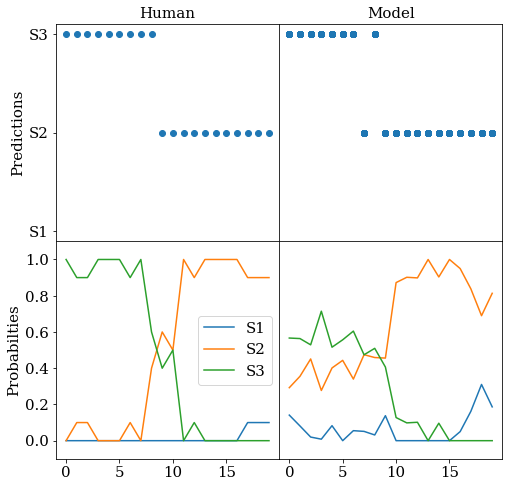

In [44]:
from numpy import array
from sklearn.metrics import r2_score as r2

sl =[[array([0., 0., 1.]), array([0.25, 0.25, 0.5 ])],
 [array([0., 0., 1.]), array([0.25, 0.5 , 0.25])],
 [array([0., 0., 1.]), array([0.25, 0.75, 0.  ])],
 [array([0., 0., 1.]), array([0.5, 0.5, 0. ])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.  , 0.75])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.25, 0.5 ])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.5 , 0.25])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.75, 0.  ])],
 [array([0.  , 0.25, 0.75]), array([0.5, 0. , 0.5])],
 [array([0.  , 0.25, 0.75]), array([0.5 , 0.25, 0.25])],
 [array([0.  , 0.25, 0.75]), array([0.5, 0.5, 0. ])],
 [array([0.  , 0.25, 0.75]), array([0.75, 0.25, 0.  ])],
 [array([0. , 0.5, 0.5]), array([0.25, 0.25, 0.5 ])],
 [array([0. , 0.5, 0.5]), array([0.5, 0. , 0.5])],
 [array([0. , 0.5, 0.5]), array([0.5 , 0.25, 0.25])],
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.25, 0.5 ])],
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.5 , 0.25])]]



ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
       'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
       #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
for wid in ignore:
    responses = responses[responses.wid != wid]
responses["response"] = responses["response"].astype('category',copy=False)
responses["target_dino"] = responses["target_dino"].astype('category',copy=False)

paccs=[]
mses=[]
plt.rcParams["font.family"] = "Serif"
r2s=[]
for num in set(responses["label_pair"]):
    print("Held-out Label Pair: {0}".format(num))
    
    responses_test = responses[responses.label_pair == num]
    responses_train = responses[responses.label_pair != num]
    cloud1 = responses_test#[responses_test.task == 'testing_c1_categorize']
    cloud1_dict={}
    for i in range(20):
        cloud1_dict[i]=[0, 0, 0]
    for i in range(len(cloud1.target_dino)):
        cloud1_dict[int(list(cloud1.target_dino)[i])][list(cloud1.response)[i]]+=1
    from sklearn.ensemble import RandomForestClassifier
    # Inputs are Loc1, Lab1, Loc2, Lab2, Loc3
    # Output is Lab3
    locs_train = [np.array([5,14])]*len(responses_train)
    labs_train = np.array([np.array(sl[i]) for i in responses_train.label_pair])
    target_locs_train = responses_train.target_dino
    y_train = responses_train.response
    X_train = [np.array([*loc/19., *lab.flatten(), target/19.]).flatten() for loc, lab, target in zip(locs_train, labs_train, target_locs_train)]
    X_train=np.array(X_train)
    y_train=np.array(y_train)

    clf = RandomForestClassifier(n_estimators=20, max_features=None)
    clf.fit(X_train, y_train)


    locs_test = [np.array([5,14])]*len(responses_test)
    labs_test = np.array([np.array(sl[i]) for i in responses_test.label_pair])
    target_locs_test = responses_test.target_dino
    y_test = responses_test.response
    X_test = [np.array([*loc/19., *lab.flatten(), target/19.]).flatten() for loc, lab, target in zip(locs_test, labs_test, target_locs_test)]
    X_test=np.array(X_test)
    y_test=np.array(y_test)

    classes = [clf.predict_proba(X_test)[np.where(target_locs_test==i)][0] for i in range(20)]
    class1 = [cloud1_dict[i][0]/sum(cloud1_dict[i]) for i in range(20)]
    class2 = [cloud1_dict[i][1]/sum(cloud1_dict[i]) for i in range(20)]
    class3 = [cloud1_dict[i][2]/sum(cloud1_dict[i]) for i in range(20)]
    pop_classes=np.argmax(np.array([class1, class2, class3]),0)
    
    pacc=np.mean(pop_classes==np.argmax(classes,1))
    paccs.append(pacc)
    mse=np.sum((classes-np.vstack([class1,class2,class3]).transpose())**2)/20
    r2s.append(r2(np.vstack([class1,class2,class3]).transpose(),classes, multioutput='variance_weighted'))
    mses.append(mse)
    print("Mean Accuracy (subject-level): {0}".format(clf.score(X_test, y_test)))
    print("Mean Accuracy (population-level): {0}".format(pacc))
    print("MSE: {0}".format(mse))
    print("R^2: {0}".format(r2s[-1]))
    
    fig = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio
    #ax = [fig.add_subplot(2,2,i+1) for i in range(4)]
    plt.subplot(2,2,1)
    plt.scatter(range(20),pop_classes)
    plt.ylim((-0.1,2.1))
    plt.title("Human", fontsize=15)
    plt.ylabel("Predictions", fontsize=15)
    plt.yticks([0,1,2],["S1", "S2", "S3"])
    plt.subplot(2,2,2)
    plt.scatter(target_locs_test, clf.predict(X_test))#,alpha = .3, s=400)  
    plt.ylim((-0.1,2.1))
    plt.yticks([])
    plt.title("Model", fontsize=15)
    #plt.show()
    
    cloud1_dict={}
    for i in range(20):
        cloud1_dict[i]=[0, 0, 0]
    for i in range(len(cloud1.target_dino)):
        cloud1_dict[int(list(cloud1.target_dino)[i])][list(cloud1.response)[i]]+=1

    plt.subplot(2,2,3)
    plt.plot(list(range(20)),class1, label="S1")
    plt.plot(list(range(20)),class2, label="S2")
    plt.plot(list(range(20)),class3, label="S3")
    #plt.title("Population")
    plt.ylabel("Probabilties", fontsize=15)
    plt.ylim((-0.1,1.1))
    plt.xticks([0,5,10,15])
    plt.legend()
    #plt.show()
    # print(np.sum(class1*np.array(range(20)))/np.sum(class1))
    # print(np.sum(class2*np.array(range(20)))/np.sum(class2))
    # print(np.sum(class3*np.array(range(20)))/np.sum(class3))

    
    plt.subplot(2,2,4)
    plt.plot(classes)
    plt.ylim((-0.1,1.1))
    plt.yticks([])
    plt.xticks([0,5,10,15])
    #plt.title("Model")
    
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.savefig("figs/ML/ML_Pair_{0}".format(num))

In [36]:
print(np.mean(mses),np.mean(paccs),len(set(responses["label_pair"])),np.mean(r2s))

0.08321937141210951 0.9 14 0.4189725395085794


In [45]:
(np.sum(r2s)-r2s[2])/(len(r2s)-1)

0.6268040812517485

In [46]:
np.mean(r2s)

0.44294346294582587